In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats,integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [3]:
# 그래프에서 선의 종류
linestyles = ['-', '--', ':']

In [4]:
def E( X, g = lambda x: x):
    x_range, f = X
    def integrand ( x ):
        return g( x ) * f ( x )

    return integrate.quad ( integrand, -np.inf, np.inf ) [ 0 ]                     

In [5]:
def V( X, g = lambda x: x):
    x_range, f = X
    mean = E( X, g)
    def integrand ( x ):
        return  (g( x ) - mean )**2 * f (x )
    return integrate.quad ( integrand, -np.inf, np.inf ) [ 0 ]   

In [6]:
def check_prob (X):
    x_range , f= X

    f_min = minimize_scalar( f ).fun
    assert f_min >=0 , ' 확률함수가 마이너스 값을 가짐'
    prob_sum = np.round ( integrate.quad ( f, -np.inf, np.inf) [0],6)
    assert prob_sum == 1, f'확률의 합이 1이 아닌 다음의 값임:{prob_sum}'
    print ( f'expected value {E(X):.3f}')
    print ( f'variance { V(X):.3f}')


In [7]:
def plot_prob( X , x_min, x_max ):
    x_range, f = X
    def F(x):
        return integrate.quad ( f, -np.inf, x) [0]

    xs = np.linspace (x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    ax.plot ( xs, [ f(x) for x in xs],
              label = 'f(x)', color = 'gray')
    ax.plot ( xs, [ F(x) for x in xs],
              label = 'F(x)', ls= '--' , color = 'red')
    
    ax.legend()
    plt.show()

In [8]:
# t 분포
#    확률변수 Z,Y는 서로 독립이고, Z는  N(0,1)을 
#    Y는 chi-squre(n)을 따르고 있을 때,
#    t = Z / sqrt(Y/n) 의 확률분포를 자유도가 n인 t분포라고 한다.
#       실수전체의 값을 취한다.

n = 10
rv1 = stats.norm ()
rv2 = stats.chi2 (n)

# 표본 크기 10만으로 무작위추출한다. 
# t변수 정의에 따라 식을 세운다
sample_size = int (1e5)
Z_sample = rv1.rvs ( sample_size)
chi2_sample = rv2.rvs (sample_size)

t_sample = Z_sample / np.sqrt (chi2_sample/n)

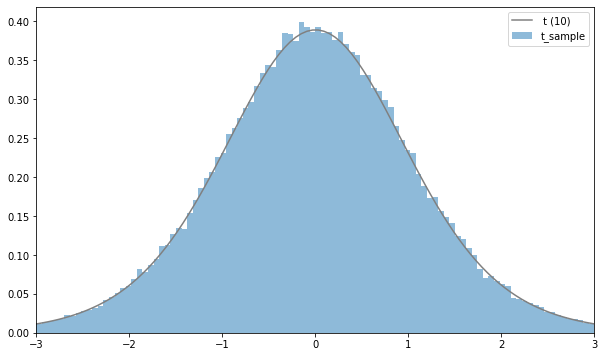

In [11]:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    rv = stats.t( n )
    xs = np.linspace ( -3, 3, 100)
    ax.hist ( t_sample, bins = 100, range = (-3, 3),
              density = True, alpha = 0.5, label = 't_sample')
    ax.plot ( xs, rv.pdf (xs),
                 label = f' t ({ n }) ', color ='gray')
    ax.legend()
    ax.set_xlim( -3, 3)
    plt.show()

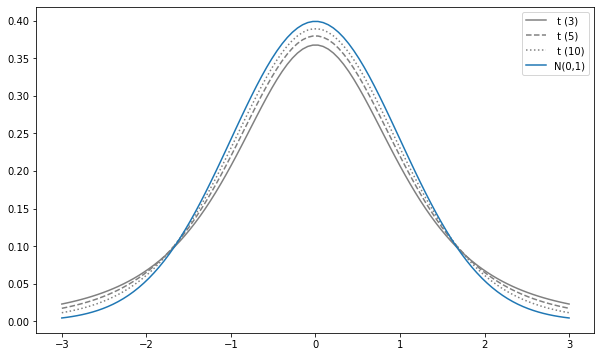

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace ( -3, 3, 100 )
for n, ls in zip([ 3, 5, 10], linestyles):
    rv = stats.t( n )
    ax.plot (xs, rv.pdf (xs),
              label = f' t ({ n })', ls=ls, color ='gray')
rv = stats.norm()
ax.plot (xs, rv.pdf(xs), label= 'N(0,1)')

ax.legend()
plt.show()

In [14]:
# 자유도 5인 t분포의 상위 5%에 해당하는 t값
rv = stats.t (5)
rv.isf (0.05)

2.015